**Step 1: Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

**Step 2: Load and Preview the Data**

In [3]:
df = pd.read_csv("2.coffeeSales.csv")
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


,money
count,1133.000000
mean,33.105808
std,5.035366
min,18.120000
25%,28.900000
50%,32.820000
75%,37.720000
max,40.000000


**Step 3: Data Cleaning**

In [4]:
# Check nulls
print(df.isnull().sum())

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Fill nulls
df['card'] = df['card'].fillna('Cash')
df['cash_type'] = df['cash_type'].fillna('Unknown')

# Convert date columns
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64


**Step 4: Feature Engineering**

In [5]:
df['month'] = df['date'].dt.strftime('%Y-%m')
df['weekday'] = df['date'].dt.day_name()
df['hour'] = df['datetime'].dt.hour

**Step 5: Exploratory Data Analysis (EDA)**

**1. Sales by Coffee Type**

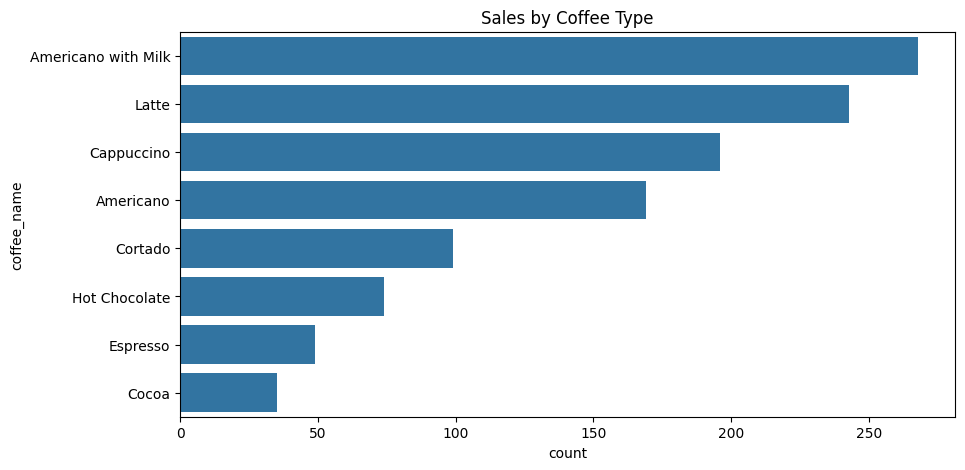

In [6]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='coffee_name', order=df['coffee_name'].value_counts().index)
plt.title("Sales by Coffee Type")
plt.show()

**2. Sales by Payment Type**

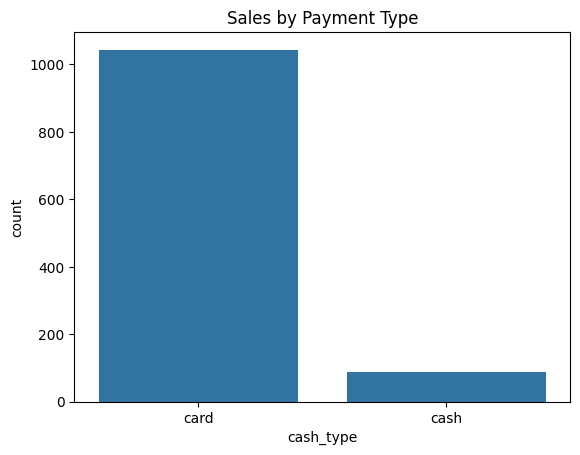

In [7]:
sns.countplot(data=df, x='cash_type')
plt.title("Sales by Payment Type")
plt.show()

**3. Monthly Sales Trend**

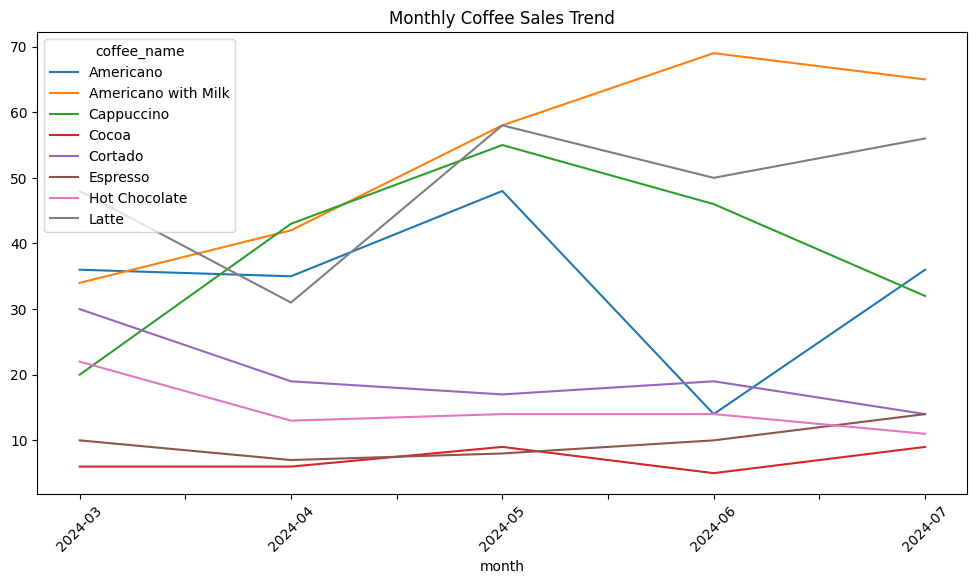

In [8]:
monthly_sales = df.groupby(['month', 'coffee_name']).size().unstack().fillna(0)
monthly_sales.plot(kind='line', figsize=(12, 6))
plt.title("Monthly Coffee Sales Trend")
plt.xticks(rotation=45)
plt.show()

**4. Hourly Sales Pattern**

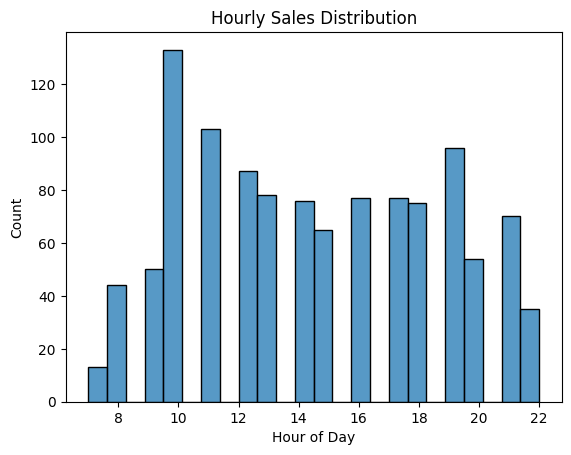

In [9]:
sns.histplot(df['hour'], bins=24, kde=False)
plt.title("Hourly Sales Distribution")
plt.xlabel("Hour of Day")
plt.show()

**5. Weekday Sales**

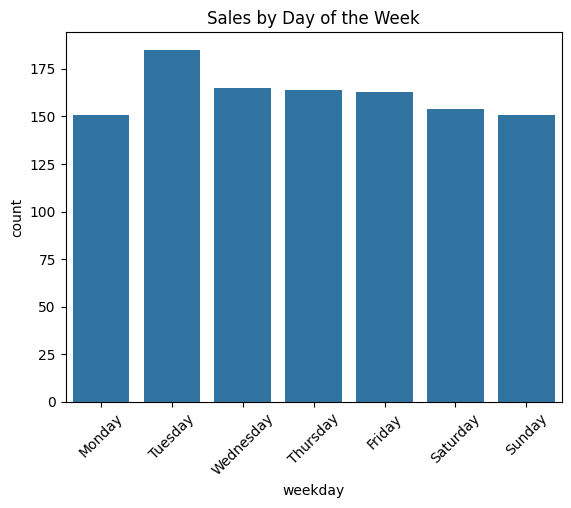

In [10]:
sns.countplot(data=df, x='weekday', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Sales by Day of the Week")
plt.xticks(rotation=45)
plt.show()

**Step 6: Predictive Model – Forecast Sales (Extra)**

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Encode categorical variables
X = df[['hour']]
X = pd.get_dummies(X)
y = df['money']  # target: money spent

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluate
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 19.007716672092233
R²: -0.02101603207401892


**Project Summary: Coffee Sales Analysis**

This project analyzes transactional coffee sales data collected from a vending machine between March 2024 and July 2024. The dataset contains over 1,100+ records and includes key information such as:

Date and time of purchase

Payment type (card or cash)

Coffee product purchased

Amount spent per transaction

**Objectives:**

Understand customer purchasing patterns by time, day, and product.

Identify top-selling coffee products.

Discover peak business hours and best-performing days.

Compare card vs. cash usage.

Generate insights for inventory planning and restocking.

Optionally, build a basic regression model to predict sales revenue.

**Tools Used:**

Python (Pandas, Matplotlib, Seaborn, Scikit-learn)